In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")
from data_processing.fetch_table import fetch_table

In [2]:
db_path = "data/TrafficCrashPatterns.db"
conn = sqlite3.connect(db_path)

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()  # List of all tables

# Print the table names
print("Tables:", tables)

Tables: [('TrafficCrashesPeople',), ('TrafficCrashesVehicles',)]


In [154]:
people_db =  fetch_table(conn, tables[0][0])
vehicles_db =  fetch_table(conn, tables[1][0])

In [147]:
vehicles_db1 = vehicles_db

In [155]:
# for the step in pipeline.py
vehicles_db['VEHICLE_YEAR'] = vehicles_db['VEHICLE_YEAR'].astype(int)
vehicles_db['OCCUPANT_CNT'] = vehicles_db['OCCUPANT_CNT'].astype(int)
# Filter vehicles_db to include only rows where VEHICLE_YEAR is below 2024
vehicles_db = vehicles_db[vehicles_db['VEHICLE_YEAR'] < 2024]
# # Replace 'TOYOTA MOTOR COMPANY, LTD.' with 'TOYOTA' in the MAKE column
# vehicles_db['MAKE'] = vehicles_db['MAKE'].replace('TOYOTA MOTOR COMPANY, LTD.', 'TOYOTA')
# Remove rows with 'TOYOTA MOTOR COMPANY, LTD.' in the MAKE column
vehicles_db = vehicles_db.loc[vehicles_db1['MAKE'] != 'TOYOTA MOTOR COMPANY, LTD.']
vehicles_db = vehicles_db.loc[vehicles_db1['MODEL'] != 'OTHER (EXPLAIN IN NARRATIVE)']
vehicles_db = vehicles_db.loc[vehicles_db1['MODEL'] != 'UNKNOWN']
vehicles_db = vehicles_db.loc[vehicles_db1['MODEL'] != 'SENTRA (DATSUN AND NISSAN HAVE MERGED)']


In [160]:
vehicles_db_not_parked = vehicles_db[vehicles_db['UNIT_TYPE'] != 'PARKED']

In [156]:
vehicles_db.head()

,CRASH_RECORD_ID,VEHICLE_ID,VEHICLE_DEFECT,MAKE,MODEL,VEHICLE_YEAR,UNIT_TYPE,OCCUPANT_CNT,TRAVEL_DIRECTION
0,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,1634931.0,UNKNOWN,NISSAN,SENTRA,2009,DRIVER,1,S
1,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,1634978.0,NONE,CHRYSLER,SEBRING,2010,DRIVER,1,S
2,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,1634948.0,UNKNOWN,SUBARU,OUTBACK,2015,DRIVER,1,W
3,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1637401.0,UNKNOWN,TOYOTA,RAV4,2018,DRIVER,1,E
4,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1637408.0,NONE,SUBARU,OUTBACK,2019,DRIVER,1,W


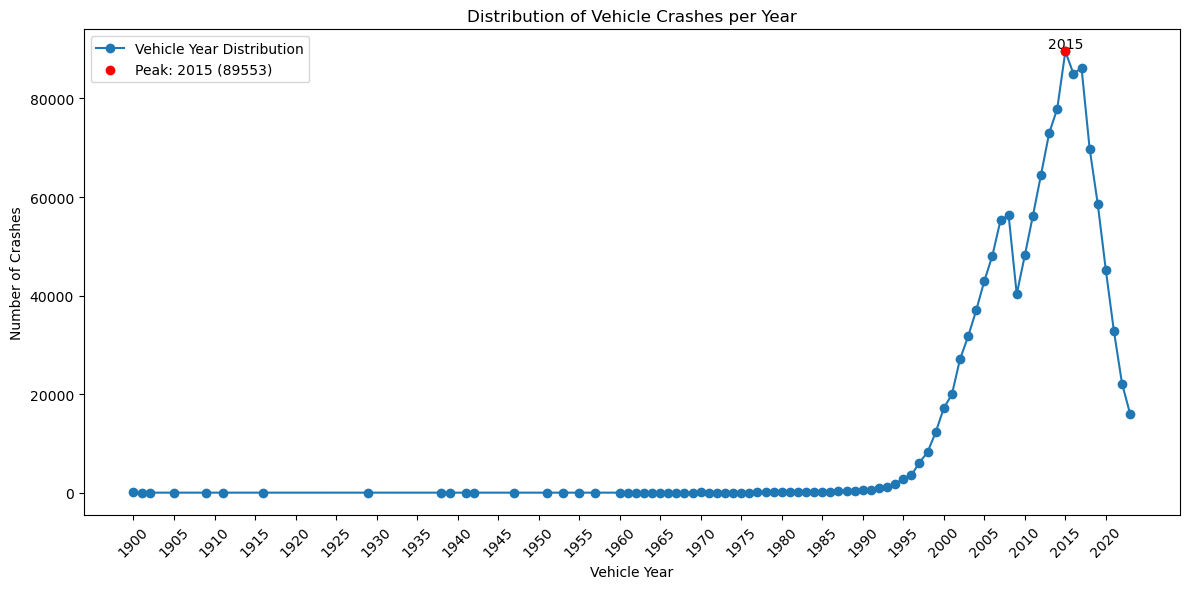

In [157]:
import matplotlib.pyplot as plt

# Vehicle year distribution
vehicle_year_distribution = vehicles_db['VEHICLE_YEAR'].value_counts().sort_index()

# Identify the peak value and corresponding year
peak_year = vehicle_year_distribution.idxmax()  # Year with the highest value
peak_value = vehicle_year_distribution.max()    # Highest value

# Line graph for vehicle year distribution
plt.figure(figsize=(12, 6))
plt.plot(vehicle_year_distribution.index, vehicle_year_distribution.values, marker='o', label='Vehicle Year Distribution')

# Highlight the peak value
plt.scatter(peak_year, peak_value, color='red', zorder=5, label=f'Peak: {peak_year} ({peak_value})')
plt.text(peak_year, peak_value, f'{peak_year}', fontsize=10, ha='center', va='bottom')

# Generate x-ticks with a gap of 5 years
x_ticks = range(int(vehicle_year_distribution.index.min()), int(vehicle_year_distribution.index.max()) + 1, 5)

# Add labels, title, and legend
plt.title('Distribution of Vehicle Crashes per Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Crashes')
# plt.grid(True)
plt.legend()
plt.xticks(x_ticks, rotation=45)  # Show x-axis values with a gap of 5 years
plt.tight_layout()
plt.show()


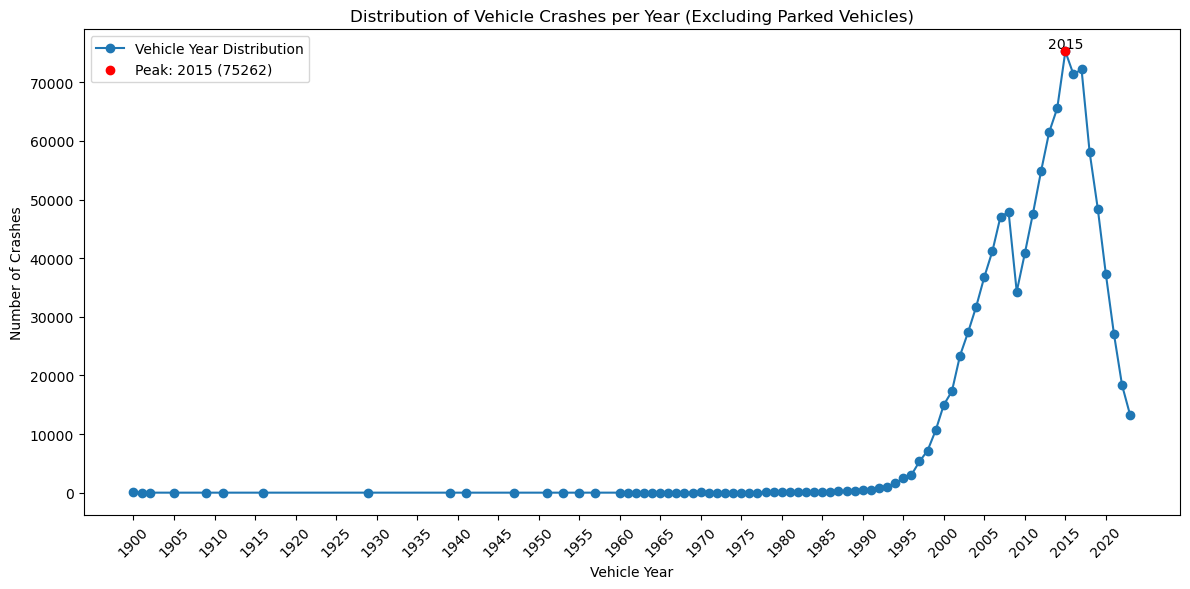

In [167]:
import matplotlib.pyplot as plt

# Vehicle year distribution
vehicle_year_distribution = vehicles_db_not_parked['VEHICLE_YEAR'].value_counts().sort_index()

# Identify the peak value and corresponding year
peak_year = vehicle_year_distribution.idxmax()  # Year with the highest value
peak_value = vehicle_year_distribution.max()    # Highest value

# Line graph for vehicle year distribution
plt.figure(figsize=(12, 6))
plt.plot(vehicle_year_distribution.index, vehicle_year_distribution.values, marker='o', label='Vehicle Year Distribution')

# Highlight the peak value
plt.scatter(peak_year, peak_value, color='red', zorder=5, label=f'Peak: {peak_year} ({peak_value})')
plt.text(peak_year, peak_value, f'{peak_year}', fontsize=10, ha='center', va='bottom')

# Generate x-ticks with a gap of 5 years
x_ticks = range(int(vehicle_year_distribution.index.min()), int(vehicle_year_distribution.index.max()) + 1, 5)

# Add labels, title, and legend
plt.title('Distribution of Vehicle Crashes per Year (Excluding Parked Vehicles)')
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Crashes')
# plt.grid(True)
plt.legend()
plt.xticks(x_ticks, rotation=45)  # Show x-axis values with a gap of 5 years
plt.tight_layout()
plt.show()


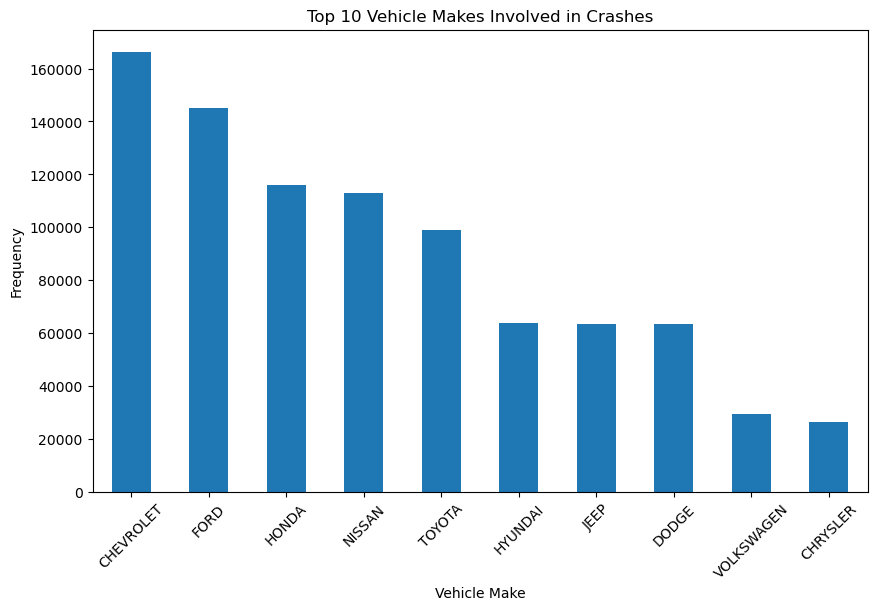

In [164]:
# Analyze the frequency of MAKE and MODEL columns
make_frequency = vehicles_db['MAKE'].value_counts()
model_frequency = vehicles_db['MODEL'].value_counts()

# Bar chart for the frequency of vehicle makes
plt.figure(figsize=(10, 6))
make_frequency.head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes Involved in Crashes')
plt.xlabel('Vehicle Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


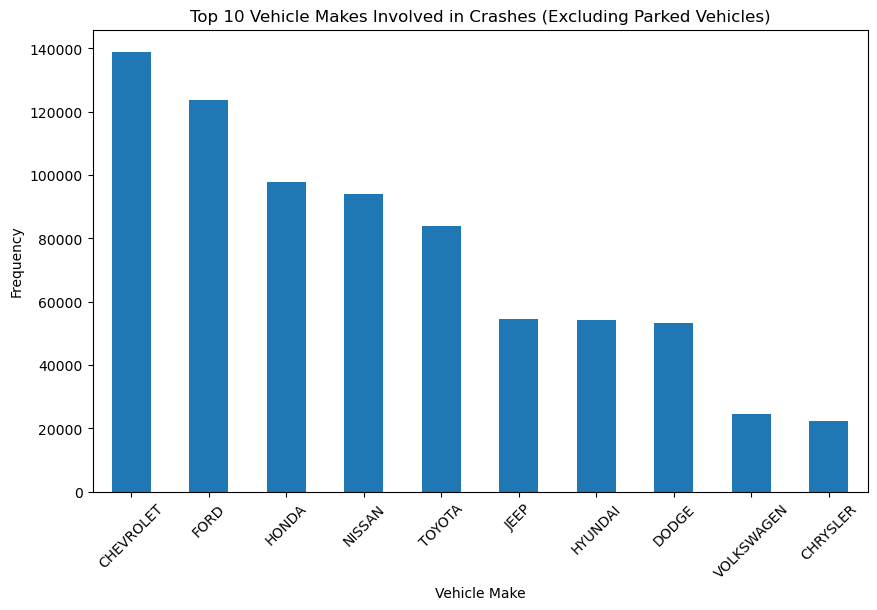

In [165]:
# Analyze the frequency of MAKE and MODEL columns
make_frequency = vehicles_db_not_parked['MAKE'].value_counts()
model_frequency = vehicles_db_not_parked['MODEL'].value_counts()

# Bar chart for the frequency of vehicle makes
plt.figure(figsize=(10, 6))
make_frequency.head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes Involved in Crashes (Excluding Parked Vehicles)')
plt.xlabel('Vehicle Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\ashee\AppData\Local\Temp\ipykernel_29720\1863105594.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Frequency'))  # Select top 3 models for each make


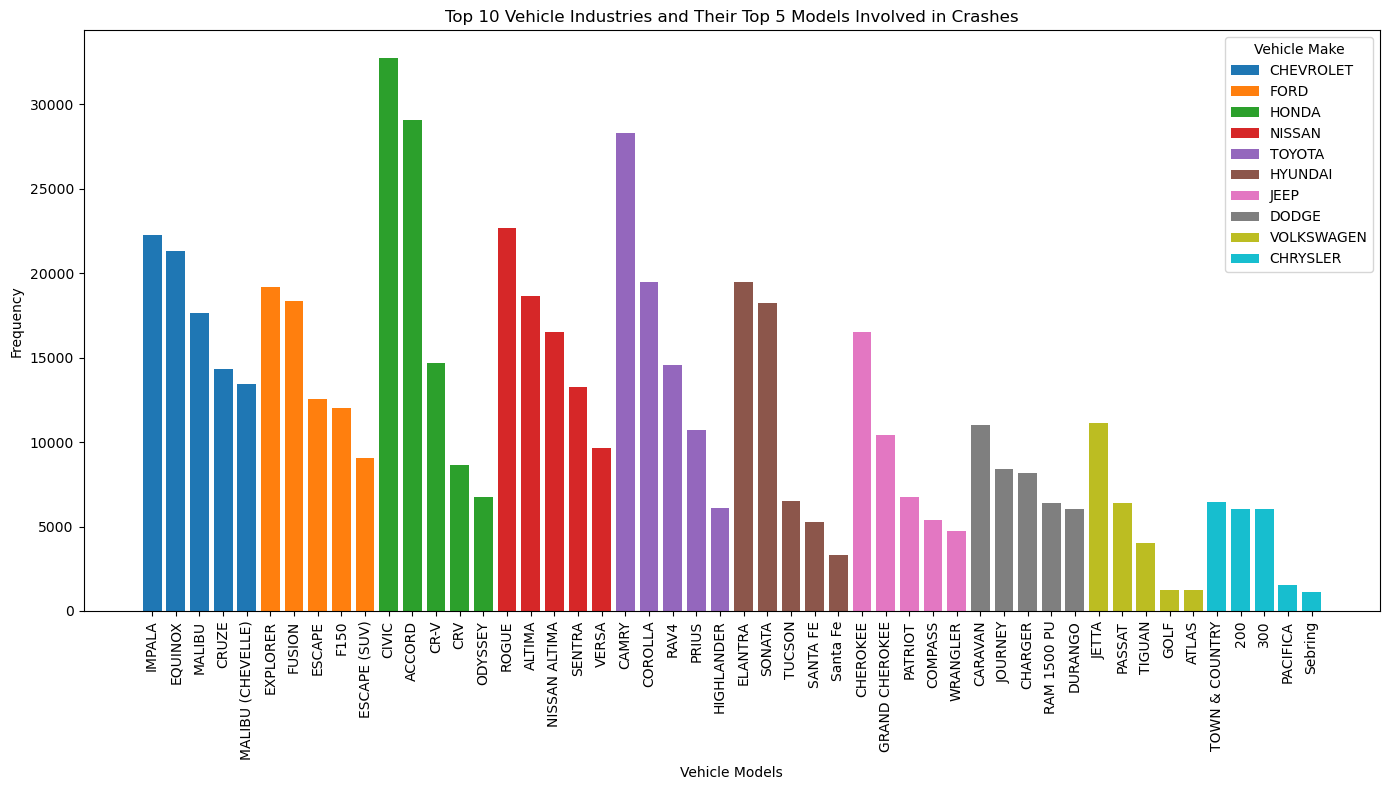

In [163]:
import matplotlib.pyplot as plt

# Group the data by MAKE and MODEL and count frequencies
make_model_frequency = vehicles_db.groupby(['MAKE', 'MODEL']).size().reset_index(name='Frequency')

# Select the top 10 makes
top_makes = make_frequency.head(10).index
filtered_make_model = make_model_frequency[make_model_frequency['MAKE'].isin(top_makes)]

# Filter top 3 models for each make
top_models_per_make = (
    filtered_make_model.groupby('MAKE')
    .apply(lambda x: x.nlargest(5, 'Frequency'))  # Select top 3 models for each make
    .reset_index(drop=True)
)

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
for make in top_makes:
    # Filter data for the current make
    make_data = top_models_per_make[top_models_per_make['MAKE'] == make]
    # Plot sub-bars for each model of the make
    plt.bar(make_data['MODEL'], make_data['Frequency'], label=make)

# Add labels, title, and legend
plt.title('Top 10 Vehicle Industries and Their Top 5 Models Involved in Crashes')
plt.xlabel('Vehicle Models')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
# plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.legend(title='Vehicle Make')  # Legend outside plot
plt.tight_layout()
plt.show()


C:\Users\ashee\AppData\Local\Temp\ipykernel_29720\3420795244.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Frequency'))  # Select top 3 models for each make


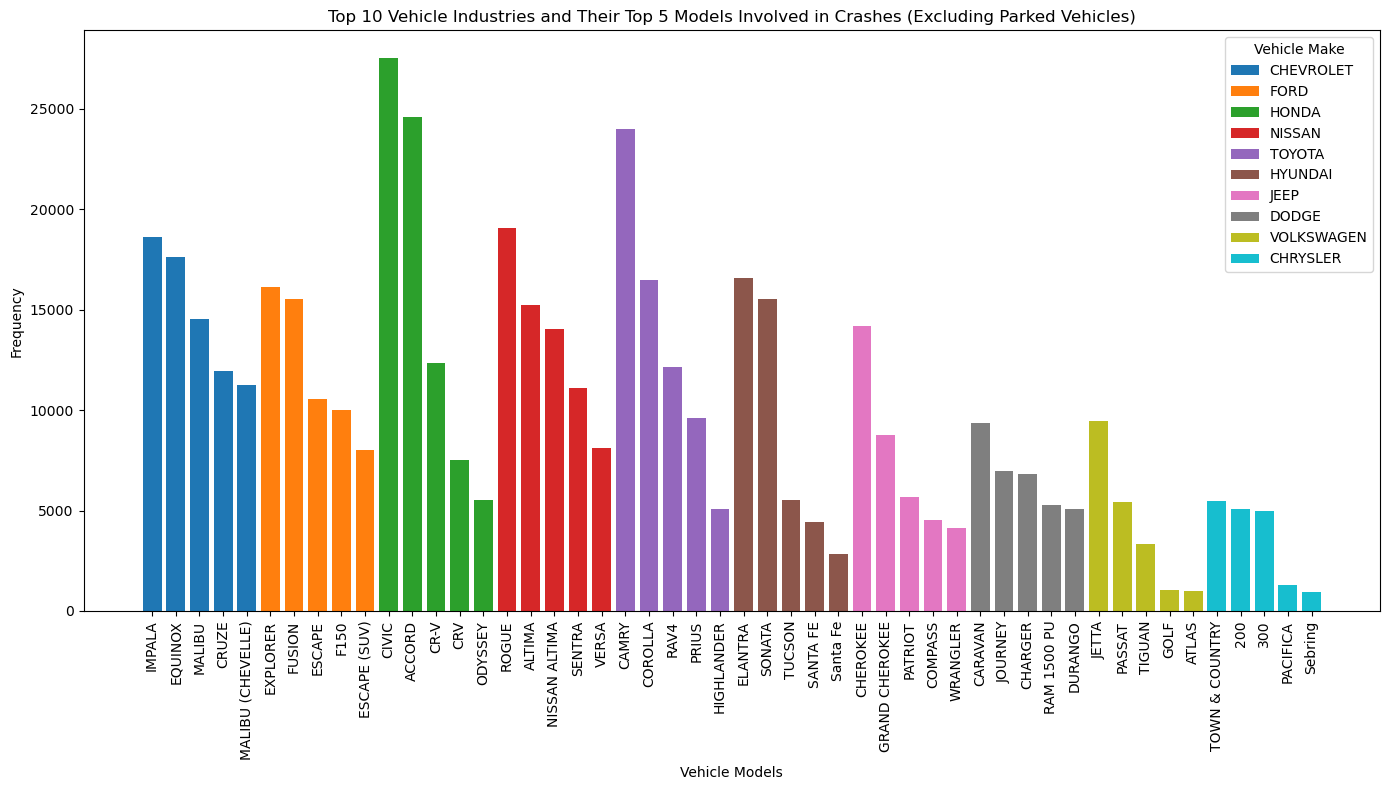

In [162]:
import matplotlib.pyplot as plt

# Group the data by MAKE and MODEL and count frequencies
make_model_frequency = vehicles_db_not_parked.groupby(['MAKE', 'MODEL']).size().reset_index(name='Frequency')

# Select the top 10 makes
top_makes = make_frequency.head(10).index
filtered_make_model = make_model_frequency[make_model_frequency['MAKE'].isin(top_makes)]

# Filter top 3 models for each make
top_models_per_make = (
    filtered_make_model.groupby('MAKE')
    .apply(lambda x: x.nlargest(5, 'Frequency'))  # Select top 3 models for each make
    .reset_index(drop=True)
)

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
for make in top_makes:
    # Filter data for the current make
    make_data = top_models_per_make[top_models_per_make['MAKE'] == make]
    # Plot sub-bars for each model of the make
    plt.bar(make_data['MODEL'], make_data['Frequency'], label=make)

# Add labels, title, and legend
plt.title('Top 10 Vehicle Industries and Their Top 5 Models Involved in Crashes (Excluding Parked Vehicles)')
plt.xlabel('Vehicle Models')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='Vehicle Make')  # Legend outside plot
# plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()
plt.show()


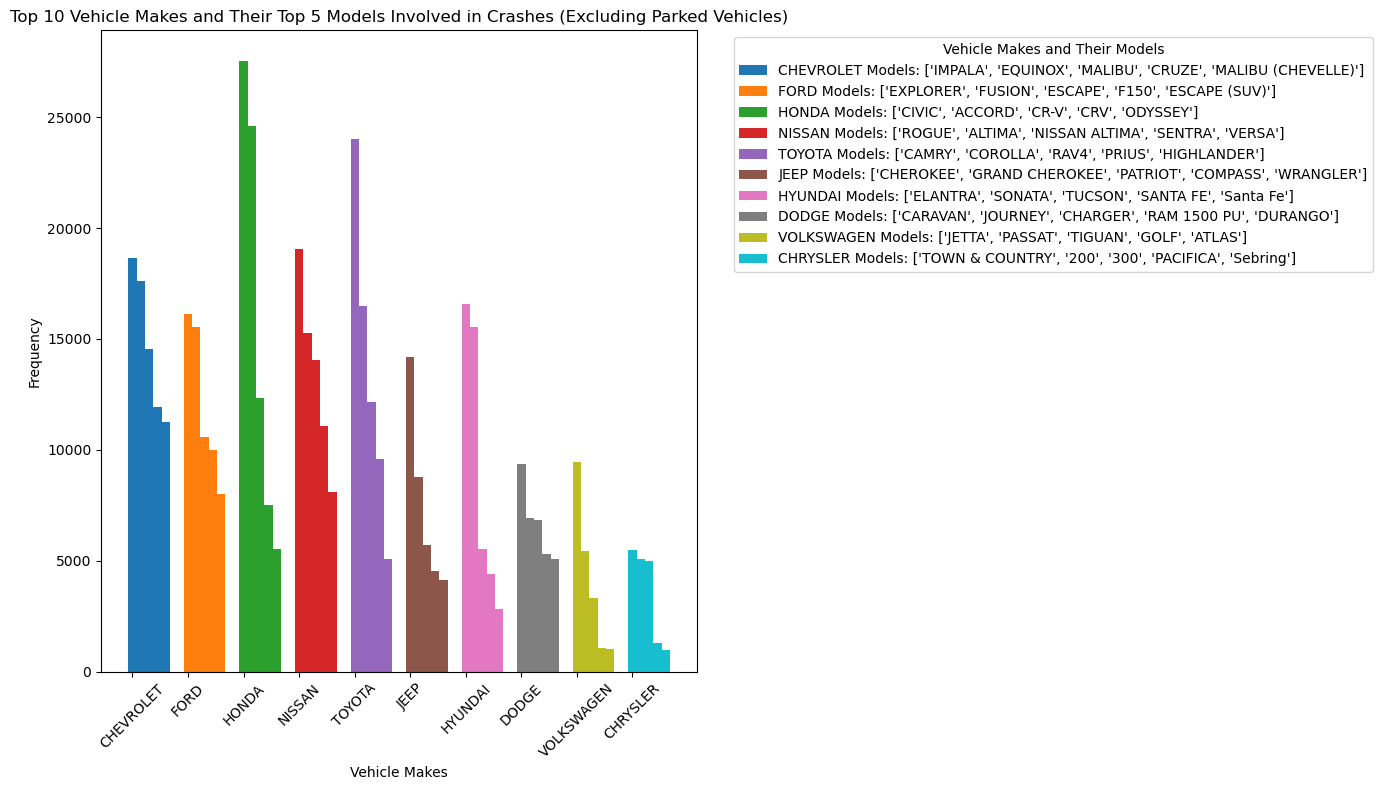

In [194]:
# Create the grouped bar chart
import numpy as np

# Define positions for the grouped bars
x_positions = np.arange(len(top_makes))  # Position for each make
bar_width = 0.15  # Width of each sub-bar

plt.figure(figsize=(14, 8))

# Iterate through each make and add sub-bars for its top 5 models
for i, make in enumerate(top_makes):
    make_data = top_models_per_make[top_models_per_make['MAKE'] == make]
    # Create sub-bars at offset positions relative to the main bar
    x_offsets = x_positions[i] + np.arange(len(make_data)) * bar_width
    plt.bar(x_offsets, make_data['Frequency'], width=bar_width, label=f'{make} Models: {list(make_data["MODEL"])}')

# Set x-ticks and labels
plt.xticks(x_positions, top_makes, rotation=45)
plt.xlabel('Vehicle Makes')
plt.ylabel('Frequency')
plt.title('Top 10 Vehicle Makes and Their Top 5 Models Involved in Crashes (Excluding Parked Vehicles)')

# Add legend
plt.legend(title='Vehicle Makes and Their Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.tight_layout()

# Display the chart
plt.show()


C:\Users\ashee\AppData\Local\Temp\ipykernel_29720\1415738974.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(3, 'Frequency'))  # Select top 3 models for each make


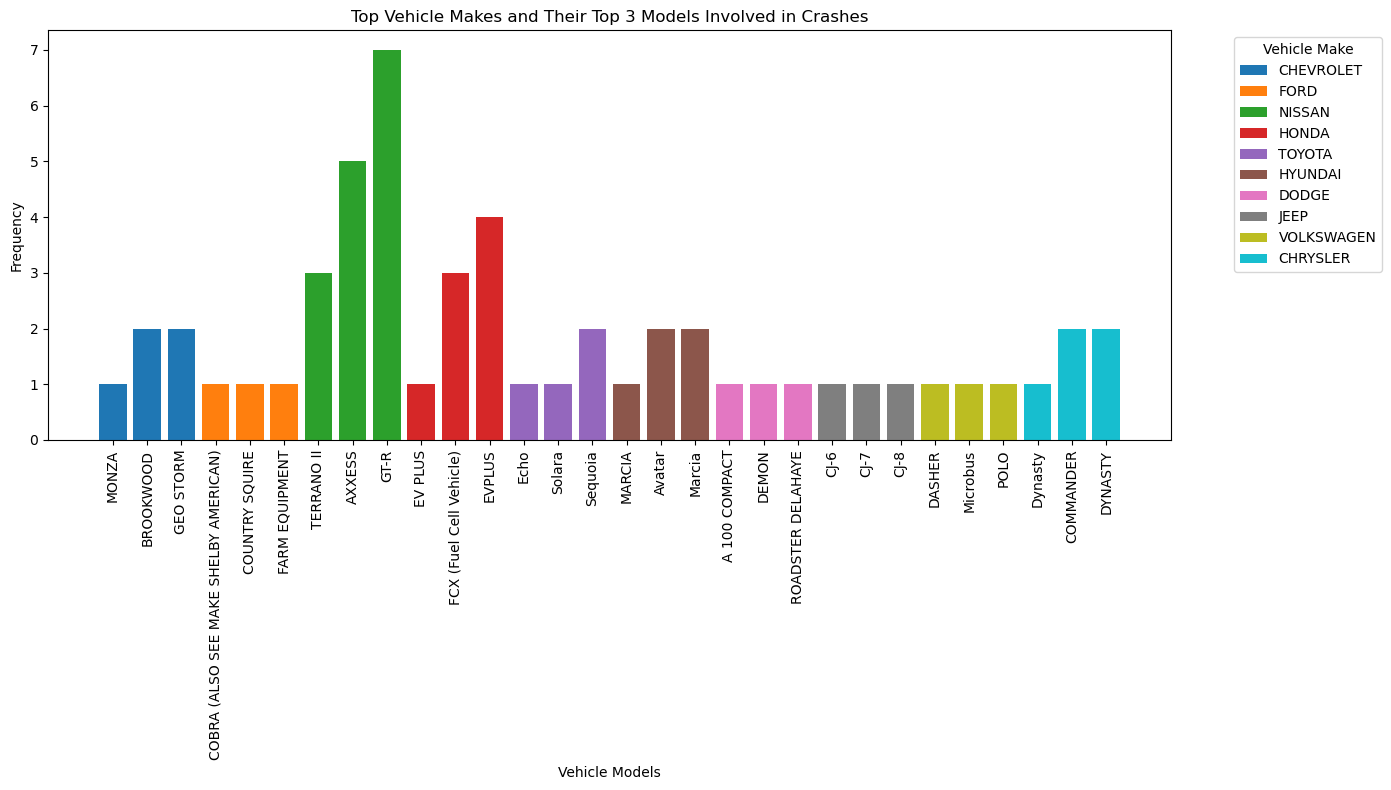

In [110]:
import matplotlib.pyplot as plt

# Group the data by MAKE and MODEL and count frequencies
make_model_frequency = vehicles_db.groupby(['MAKE', 'MODEL']).size().reset_index(name='Frequency')

# Select the top 10 makes
top_makes = make_frequency.head(10).index
filtered_make_model = make_model_frequency[make_model_frequency['MAKE'].isin(top_makes)]

# Filter top 3 models for each make
top_models_per_make = (
    filtered_make_model.groupby('MAKE')
    .apply(lambda x: x.nsmallest(3, 'Frequency'))  # Select top 3 models for each make
    .reset_index(drop=True)
)

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
for make in top_makes:
    # Filter data for the current make
    make_data = top_models_per_make[top_models_per_make['MAKE'] == make]
    # Plot sub-bars for each model of the make
    plt.bar(make_data['MODEL'], make_data['Frequency'], label=make)

# Add labels, title, and legend
plt.title('Top Vehicle Makes and Their Top 3 Models Involved in Crashes')
plt.xlabel('Vehicle Models')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()
plt.show()


In [117]:
vehicles_db.head()

,CRASH_RECORD_ID,VEHICLE_ID,VEHICLE_DEFECT,MAKE,MODEL,VEHICLE_YEAR,UNIT_TYPE,OCCUPANT_CNT,TRAVEL_DIRECTION
0,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,1634931.0,UNKNOWN,NISSAN,SENTRA,2009,DRIVER,1,S
1,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,1634978.0,NONE,CHRYSLER,SEBRING,2010,DRIVER,1,S
2,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,1634948.0,UNKNOWN,SUBARU,OUTBACK,2015,DRIVER,1,W
3,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1637401.0,UNKNOWN,TOYOTA,RAV4,2018,DRIVER,1,E
4,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1637408.0,NONE,SUBARU,OUTBACK,2019,DRIVER,1,W


In [132]:
# Filter for rows where MAKE is 'TOYOTA' and MODEL is 'CIVIC'
toyota_civic_data = vehicles_db[(vehicles_db['MAKE'] == 'HONDA') & (vehicles_db['MODEL'] == 'CIVIC')]

# Count the number of accidents per year
accidents_by_year = toyota_civic_data['VEHICLE_YEAR'].value_counts()

# Find the year with the most accidents
most_accidents_year = accidents_by_year.idxmax()
most_accidents_count = accidents_by_year.max()

# Display the result
print(f"The year with the most accidents for TOYOTA CIVIC is {most_accidents_year} with {most_accidents_count} accidents.")


The year with the most accidents for TOYOTA CIVIC is 2012 with 2295 accidents.


In [189]:
# Filter for vehicles from the year 2015
vehicles_2015 = vehicles_db_not_parked[vehicles_db_not_parked["VEHICLE_YEAR"] == 2015]

# Count occurrences of each MAKE and MODEL combination
make_model_counts = vehicles_2015.groupby(["MAKE", "MODEL"]).size().reset_index(name="Count")

# Find the MAKE and MODEL with the most accidents in 2015
most_accidents = make_model_counts.loc[make_model_counts["Count"].idxmax()]


# Extract the details
make = most_accidents["MAKE"]
model = most_accidents["MODEL"]
count = most_accidents["Count"]

# Print the result in the desired format
print(f"The {make} {model} had the most accidents in 2015 with a total of {count} accidents.")


The NISSAN ROGUE had the most accidents in 2015 with a total of 2329 accidents.


In [191]:
# Filter for vehicles from the year 2015
vehicles_2015 = vehicles_db_not_parked[vehicles_db_not_parked["VEHICLE_YEAR"] == 2015]

# Count occurrences of each MAKE and MODEL combination
make_model_counts = vehicles_2015.groupby(["MAKE", "MODEL"]).size().reset_index(name="Count")

# Find the top 3 MAKE and MODEL combinations with the most accidents in 2015
top_3_accidents = make_model_counts.nlargest(3, "Count")

print("Top 3 MAKE and MODEL with the most accidents in 2015:")
# Print the results in the desired format
for index, row in top_3_accidents.iterrows():
    make = row["MAKE"]
    model = row["MODEL"]
    count = row["Count"]
    print(f"The {make} {model} had {count} accidents in 2015.")


Top 3 MAKE and MODEL with the most accidents in 2015:
The NISSAN ROGUE had 2329 accidents in 2015.
The CHRYSLER 200 had 2000 accidents in 2015.
The JEEP CHEROKEE had 1884 accidents in 2015.


In [ ]:
# Count occurrences of each MAKE and MODEL combination
make_model_counts_all = vehicles_db_not_parked.groupby(["MAKE", "MODEL"]).size().reset_index(name="Count")

# Find the MAKE and MODEL with the most crashes
most_accidents_all = make_model_counts_all.loc[make_model_counts_all["Count"].idxmax()]

# Extract the details
make = most_accidents_all["MAKE"]
model = most_accidents_all["MODEL"]
count = most_accidents_all["Count"]

# Print the result in the desired format
print(f"The {make} {model} had the most accidents throughout the years with a total of {count} accidents.")


The HONDA CIVIC had the most accidents throughout the years with a total of 27536 accidents.


NOW population dataset

In [171]:
people_db.head()

,PERSON_ID,CRASH_RECORD_ID,SEX,AGE,DRIVER_VISION,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,BAC_RESULT
0,O749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,25.0,UNKNOWN,NONE PRESENT,NO INDICATION OF INJURY,TEST NOT OFFERED
1,O871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,37.0,NOT OBSCURED,SAFETY BELT USED,NO INDICATION OF INJURY,TEST NOT OFFERED
2,O848601,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,F,34.0,NOT OBSCURED,SAFETY BELT USED,NO INDICATION OF INJURY,TEST NOT OFFERED
3,O877654,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,M,53.0,UNKNOWN,SAFETY BELT USED,NO INDICATION OF INJURY,TEST NOT OFFERED
4,O879085,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,M,65.0,UNKNOWN,USAGE UNKNOWN,NO INDICATION OF INJURY,TEST NOT OFFERED


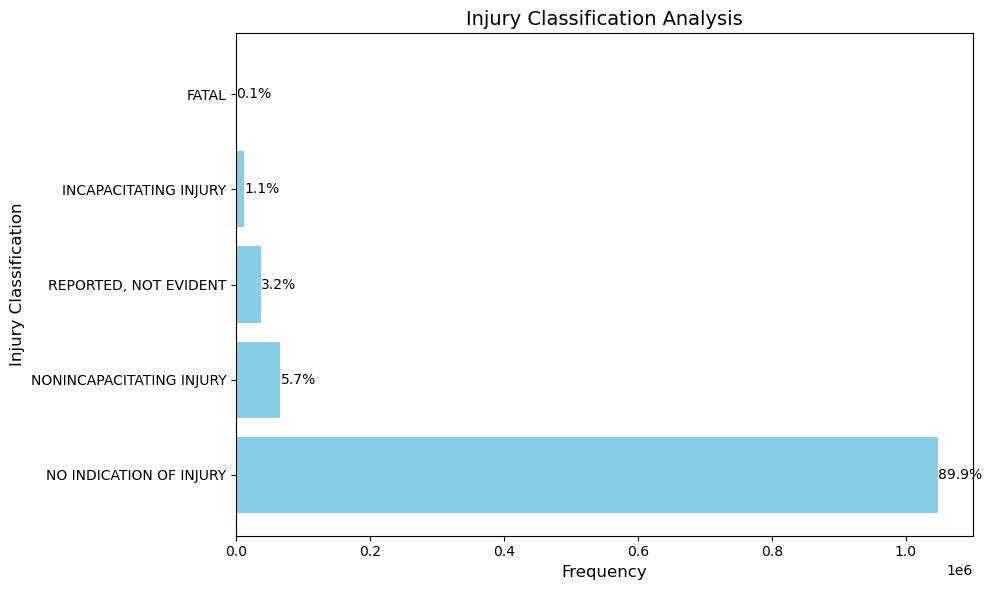

In [ ]:
# important 5
# Horizontal Bar Chart with Percentages: Frequency of Injury Classifications
injury_counts = people_db["INJURY_CLASSIFICATION"].value_counts()
total = injury_counts.sum()

plt.figure(figsize=(10, 6))
bars = plt.barh(injury_counts.index, injury_counts, color="skyblue")

# Adding percentage labels in front of the bars
for bar, count in zip(bars, injury_counts):
    percentage = (count / total) * 100
    plt.text(count, bar.get_y() + bar.get_height() / 2, f"{percentage:.1f}%", va="center")

plt.title("Injury Classification Analysis", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Injury Classification", fontsize=12)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

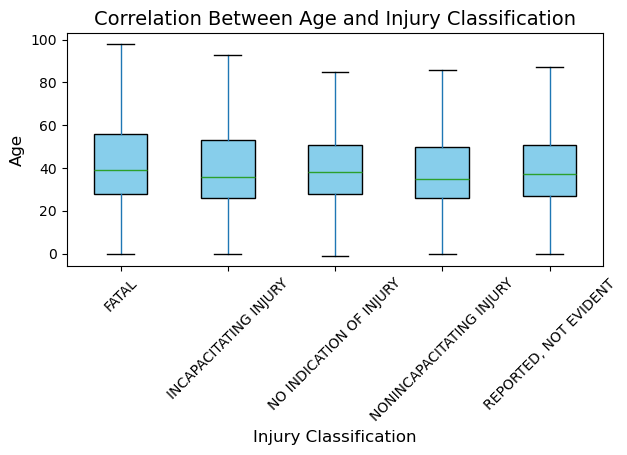

In [ ]:
# 6
# Box Plot: Relationship Between Age and Injury Classification (Without Outliers)
plt.figure(figsize=(10, 6))
people_db.boxplot(
    column="AGE",
    by="INJURY_CLASSIFICATION",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="skyblue"),
    showfliers=False  # Hides outliers
)

plt.title("Correlation Between Age and Injury Classification", fontsize=14)
plt.suptitle("")  # Remove default boxplot title
plt.xlabel("Injury Classification", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel("Age", fontsize=12)
plt.tight_layout()
plt.show()


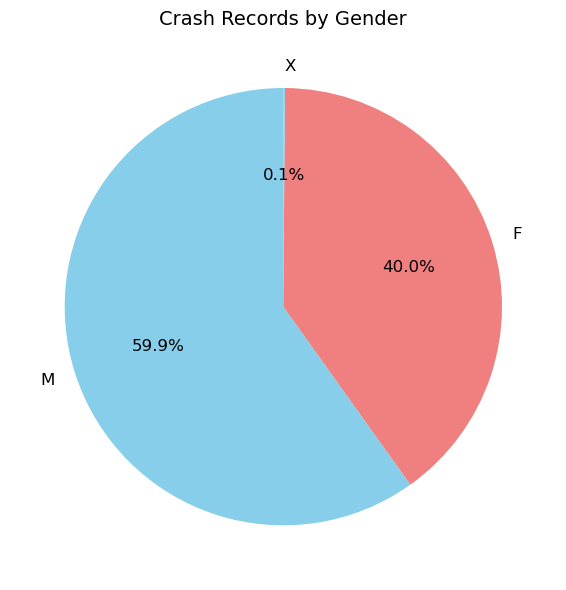

In [192]:
# 9:
    # Pie Chart: Proportion of Crashes by Gender
gender_counts = people_db["SEX"].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, textprops={"fontsize": 12}, colors=["skyblue", "lightcoral"])
plt.title("Crash Records by Gender", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()



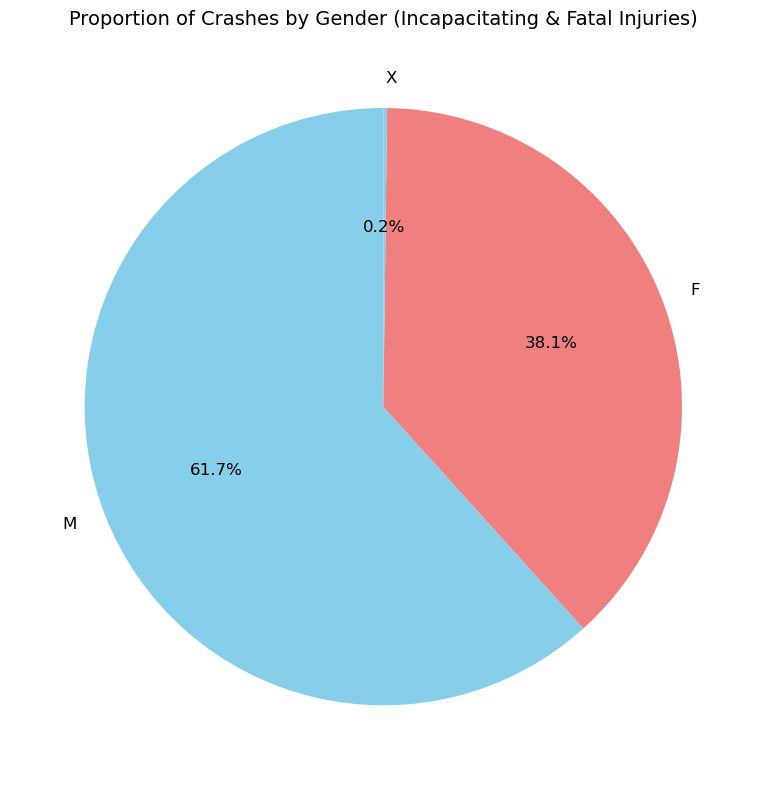

In [186]:

# Filtering data for "INCAPACITATING INJURY" and "FATAL INJURY"
incap_and_fatal_injuries = people_db[people_db["INJURY_CLASSIFICATION"].isin(["INCAPACITATING INJURY", "FATAL INJURY"])]
# 9:
    # Pie Chart: Proportion of Crashes by Gender
gender_counts = incap_and_fatal_injuries["SEX"].value_counts()

plt.figure(figsize=(8, 8))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, textprops={"fontsize": 12}, colors=["skyblue", "lightcoral"])
plt.title("Proportion of Crashes by Gender (Incapacitating & Fatal Injuries)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()